In [1]:
"""***************************** 24th mar'23 Assignment *****************************"""

"***************************** 24th mar'23 Assignment *****************************"

#### Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- Fixed Acidity: This feature represents the amount of non-volatile acids in the wine. It plays a significant role in determining the overall taste and acidity of the wine. Higher levels of fixed acidity can contribute to a more sour or tart taste, while lower levels can make the wine taste smoother.
- Volatile Acidity: Volatile acidity refers to the presence of volatile acids in the wine, primarily acetic acid. In excess, volatile acidity can give the wine an unpleasant vinegar-like taste and aroma. Therefore, lower levels of volatile acidity are generally desired for better wine quality.
- Citric Acid: Citric acid is a natural acid found in citrus fruits and is sometimes added to wines as an additive. It can contribute to the wine's freshness and enhance its flavor. The presence of an appropriate level of citric acid can positively impact the wine quality.
- Residual Sugar: This feature represents the amount of sugar that remains after fermentation is complete. It affects the wine's sweetness and balance. Higher levels of residual sugar can result in a sweeter wine, while lower levels produce a drier taste. The optimal level of residual sugar depends on the wine style and personal preferences.
- Chlorides: Chlorides are salts that can be present in wine. Their concentration can impact the wine's taste and contribute to its overall balance. An appropriate level of chlorides is desirable to avoid overpowering or unbalanced flavors.
- Free Sulfur Dioxide: Sulfur dioxide is commonly used as a preservative in winemaking. The presence of free sulfur dioxide in the wine helps prevent microbial growth and oxidation. It is an important factor in maintaining the wine's stability and shelf life.
- Total Sulfur Dioxide: Total sulfur dioxide includes both free and bound forms of sulfur dioxide. Bound sulfur dioxide is chemically attached to other components in the wine. The total sulfur dioxide level is an indicator of the wine's overall sulfur content, which affects its stability and preservation.
- Density: Density is a measure of the wine's mass per unit volume. It can provide information about the wine's alcohol content, sweetness, and overall body. Higher density may indicate a higher alcohol content or residual sugar, while lower density can suggest a lighter-bodied wine.
- pH: The pH level indicates the wine's acidity or alkalinity. It plays a crucial role in the wine's sensory attributes, microbial stability, and overall balance. The appropriate pH level varies depending on the wine style, but generally, a lower pH is associated with higher acidity.
- Sulphates: Sulphates, specifically potassium sulphate, can be added to wine during the winemaking process. They act as a preservative and can also influence the wine's aroma and flavor. The presence of an appropriate level of sulphates can contribute to the wine's quality.
- Alcohol: The alcohol content of the wine can greatly impact its taste, body, and overall quality. It contributes to the wine's perceived sweetness, warmth, and mouthfeel. Different wine styles have varying alcohol levels, and achieving the right balance is crucial for a well-made wine.
- quality: quality of Wine rating

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


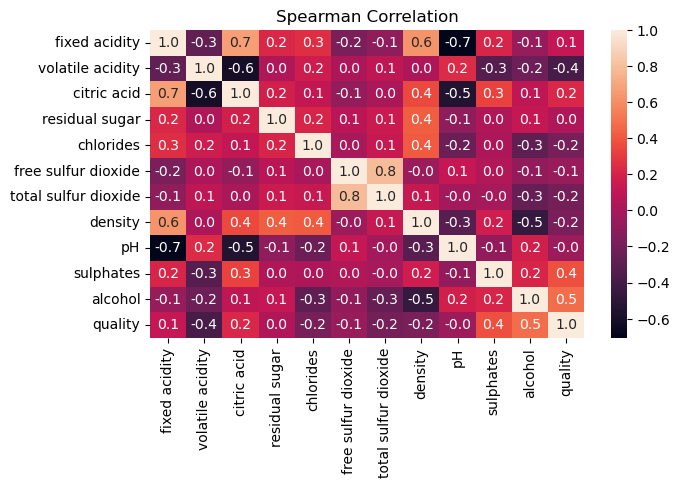

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,4))
sns.heatmap(wine.corr(method='spearman'),annot=True,fmt='.1f')
plt.title('Spearman Correlation')
plt.show()

<AxesSubplot: >

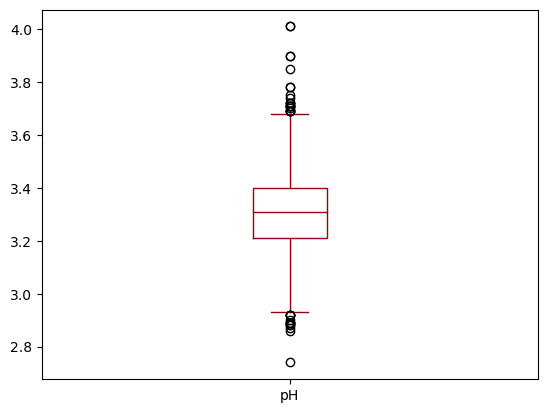

In [22]:
wine.pH.plot(kind = 'box',color='#990012')

#### Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

In [25]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

 I can provide a general overview of common techniques used in handling missing data and discuss their advantages and disadvantages :
 - Deletion: This approach involves removing rows or columns with missing data. It can be done in two ways: list-wise deletion (removing entire rows with missing values) or pairwise deletion (retaining rows with complete data for specific variables).

    Advantages: Simple to implement, avoids imputation assumptions.
    
    Disadvantages: Reduces the sample size, potential loss of valuable information, can introduce bias if missingness is not random.

- Mean/Mode Imputation: Missing values are replaced with the mean (for continuous variables) or mode (for categorical variables) of the available data.

    Advantages: Easy to implement, preserves the overall distribution.
    
    Disadvantages: Ignores variable correlations, reduces variance, does not account for uncertainty, can underestimate standard errors.

- Median/Random Imputation: Missing values are replaced with the median (for continuous variables) or a randomly selected value from the variable's distribution.

    Advantages: Retains the distribution's central tendency, introduces some randomness.
    
    Disadvantages: Ignores variable correlations, does not capture the true value, random imputation may not reflect the underlying distribution.

- Regression Imputation: A regression model is used to predict missing values based on other variables. The model is trained using rows with complete data.

    Advantages: Captures relationships between variables, incorporates more information.
    
    Disadvantages: Assumes linearity and may introduce bias if the relationship is not linear, can be computationally expensive.

- Multiple Imputation: Multiple imputation generates multiple plausible imputations by creating multiple datasets with imputed values. Each dataset is then analyzed, and the results are combined using specific rules.

    Advantages: Accounts for uncertainty, captures variability in imputation, preserves relationships.
    
    Disadvantages: Requires additional computational resources, complex implementation.

#### Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

In [33]:
student = pd.read_csv('stud (1).csv')
student.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [34]:
student['total_score'] = student['math_score'] + student['reading_score'] + student['writing_score']
student.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278


In [36]:
student_corr =student.corr(numeric_only=True)
student_corr

,math_score,reading_score,writing_score,total_score
math_score,1.000000,0.817580,0.802642,0.918746
reading_score,0.817580,1.000000,0.954598,0.970331
writing_score,0.802642,0.954598,1.000000,0.965667
total_score,0.918746,0.970331,0.965667,1.000000


<AxesSubplot: ylabel='total_score'>

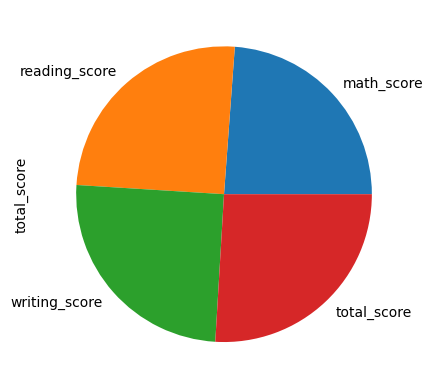

In [47]:
student_corr.total_score.plot(kind = 'pie')

#### Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

In [49]:
student.describe()

,math_score,reading_score,writing_score,total_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


In [53]:
## to check duplicate recoreds
student[student.duplicated()]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score


In [55]:
student['total_score'] = (student['math_score']+student['reading_score']+student['writing_score'])
student['average'] = student['total_score']/3
student.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [58]:
X = student.drop(labels=['math_score','reading_score','writing_score','total_score','average'],axis=1)
Y = student[['average']]
# Seperating Categorical and Numerical features
cat_cols = list(X.select_dtypes(include='object').columns)
num_cols = list(X.select_dtypes(exclude='object').columns)
print(f'Categorical Columns : {cat_cols}')
print(f'Numerical Columns : {num_cols}')

Categorical Columns : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
Numerical Columns : []


###### transform the variables for your model:

In [59]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [60]:
encoded = encoder.fit_transform(student[['average']])
# it will sort alphabatic manner|

In [61]:
encoded_student = pd.DataFrame(encoded.toarray(),columns=encoder.get_feature_names_out())
encoded_student

,average_9.0,average_18.333333333333332,average_23.0,average_23.333333333333332,average_26.0,average_29.333333333333332,average_29.666666666666668,average_30.0,average_30.666666666666668,average_31.0,...,average_96.0,average_96.33333333333333,average_96.66666666666667,average_97.0,average_97.33333333333333,average_97.66666666666667,average_98.66666666666667,average_99.0,average_99.66666666666667,average_100.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/tmp/ipykernel_2380/2696235385.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
/tmp/ipykernel_2380/2696235385.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
/tmp/ipykernel_2380/2696235385.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


<AxesSubplot: xlabel='pH', ylabel='Count'>

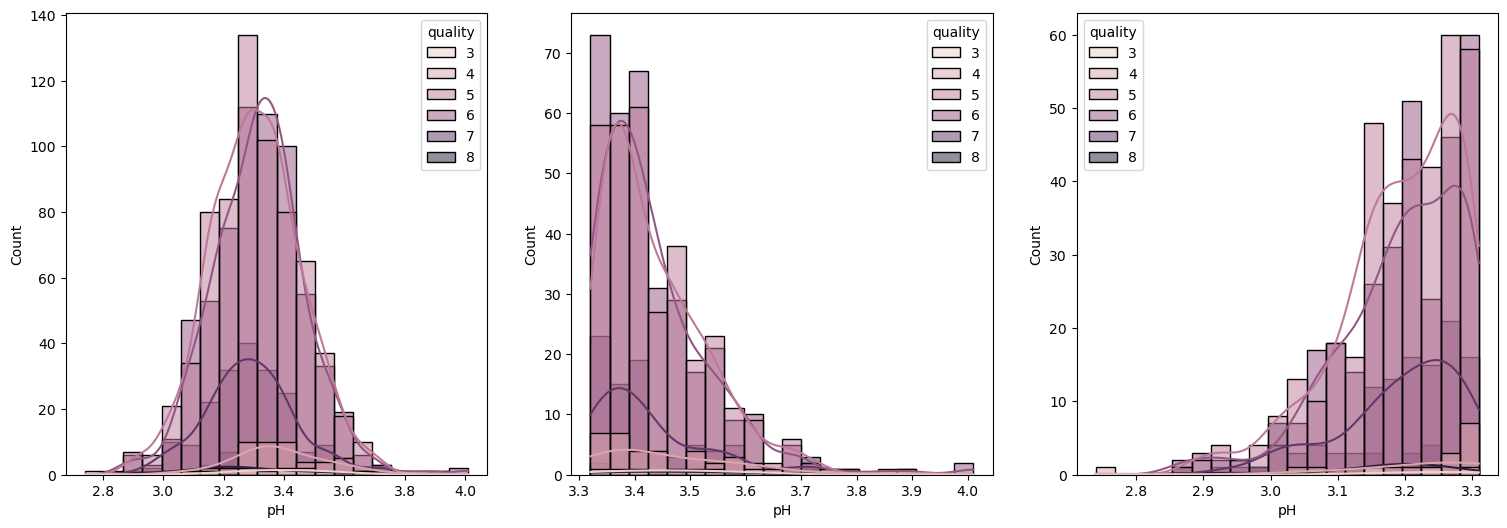

In [6]:
import matplotlib.pyplot as plt
fig,axis = plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data=wine,x='pH',bins=20,kde=True,hue='quality')
plt.subplot(142)
sns.histplot(data=wine[wine.pH>3.310],x='pH',bins=20,kde=True,hue='quality')
plt.subplot(143)
sns.histplot(data=wine[wine.pH<=3.310],x='pH',bins=20,kde=True,hue='quality')

In [9]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [6]:
wine.shape

(1599, 12)

In [5]:
wine.duplicated().sum()

240

In [7]:
wine = wine.drop_duplicates()
wine.shape

(1359, 12)

In [24]:
import scipy.stats as stat
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
def qq_plot(df, feature):
    plt.figure(figsize=(5,2))
    plt.subplot(1,2,1)
    sns.histplot(df[feature],kde=True,color='#990012')
    plt.title(f'Histogram Plot for : {feature}')
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(f'Q-Q Plot for : {feature}')
    plt.show()

Feature : fixed acidity


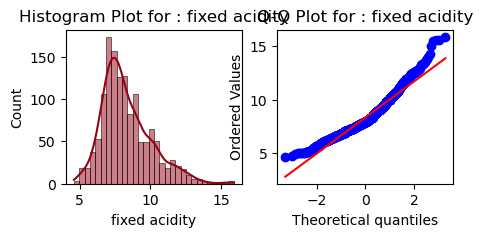


                                                  

Feature : volatile acidity


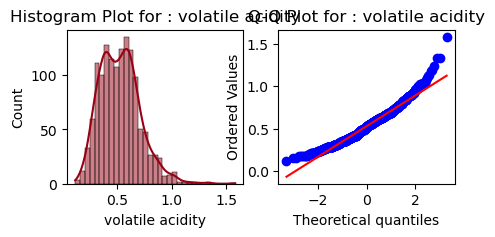


                                                  

Feature : citric acid


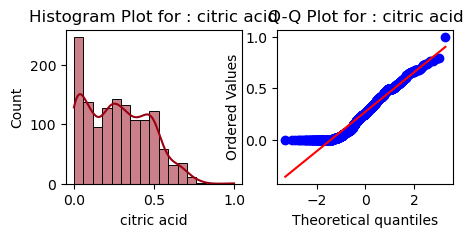


                                                  

Feature : residual sugar


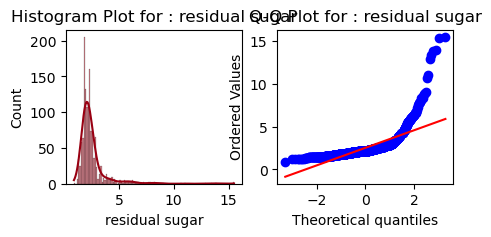


                                                  

Feature : chlorides


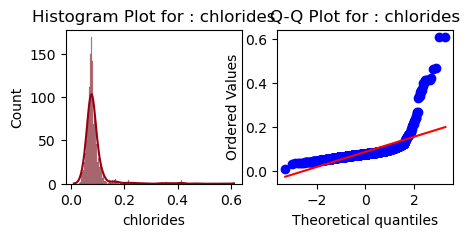


                                                  

Feature : free sulfur dioxide


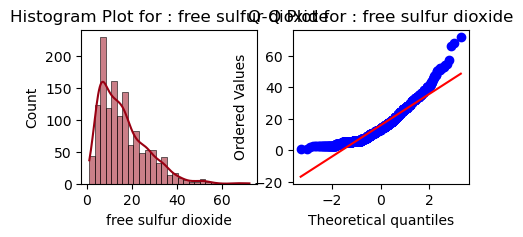


                                                  

Feature : total sulfur dioxide


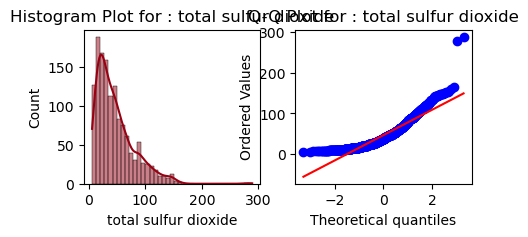


                                                  

Feature : density


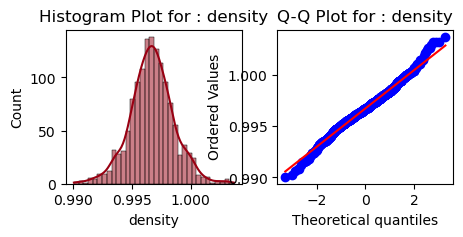


                                                  

Feature : pH


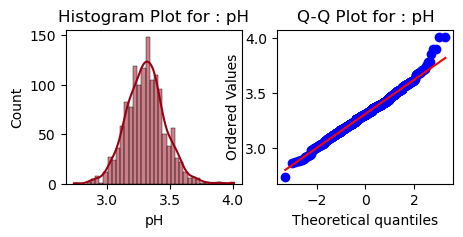


                                                  

Feature : sulphates


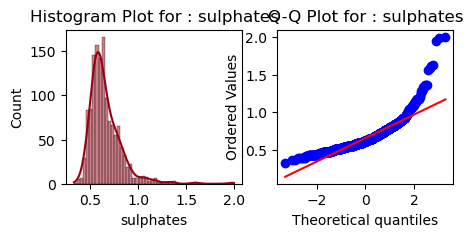


                                                  

Feature : alcohol


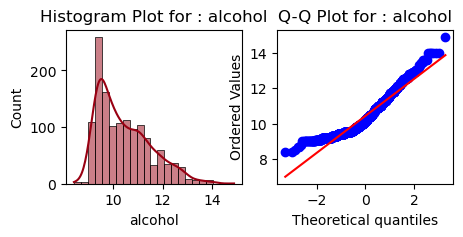


                                                  

Feature : quality


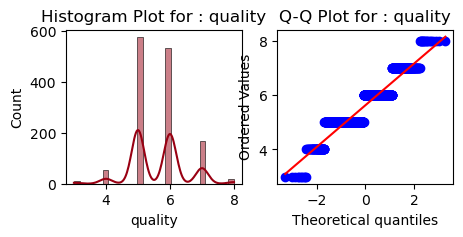

In [25]:
for i in wine.columns:
    print(f'Feature : {i}')
    qq_plot(wine,i)
    print('\n'+' '*50 + '\n')

#### Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [26]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [27]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [28]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [30]:
#Step 1 : Seperate X and Y Variables in dataset
X = wine.drop(labels=['quality'],axis=1)
Y = wine[['quality']]

In [35]:
# Step 2: Train Test Split of Data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=56)
xtrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
886,9.0,0.800,0.12,2.4,0.083,8.0,28.0,0.99836,3.33,0.65,10.4
127,8.1,1.330,0.00,1.8,0.082,3.0,12.0,0.99640,3.54,0.48,10.9
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6
585,7.6,0.510,0.24,2.4,0.091,8.0,38.0,0.99800,3.47,0.66,9.6
691,9.2,0.920,0.24,2.6,0.087,12.0,93.0,0.99980,3.48,0.54,9.8


In [36]:
xtest.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
83,7.3,0.67,0.26,1.8,0.401,16.0,51.0,0.99690,3.16,1.14,9.4
1402,7.6,0.30,0.42,2.0,0.052,6.0,24.0,0.99630,3.44,0.82,11.9
256,9.4,0.34,0.37,2.2,0.075,5.0,13.0,0.99800,3.22,0.62,9.2
1100,8.4,0.34,0.42,2.1,0.072,23.0,36.0,0.99392,3.11,0.78,12.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0


In [37]:
#Step 3 : Perform Standard Scaling (Z-score scaling)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)
xtrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.398161,1.495119,-0.773150,-0.086606,-0.099054,-0.746281,-0.558303,0.884899,0.116547,-0.039636,-0.041181
1,-0.118376,4.418378,-1.389402,-0.532242,-0.120732,-1.218820,-1.053623,-0.161685,1.485075,-1.032082,0.426408
2,-0.807093,0.860827,-1.389402,-0.012333,0.377850,0.576828,-0.279686,-0.054890,0.963731,-0.506669,0.145855
3,-0.405342,-0.104400,-0.156898,-0.086606,0.074365,-0.746281,-0.248728,0.692669,1.028899,0.018744,-0.789324
4,0.512947,2.156989,-0.156898,0.061939,-0.012344,-0.368250,1.453935,1.653817,1.094067,-0.681807,-0.602288


In [38]:
xtest.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.577521,0.778093,-0.054189,-0.532242,6.794377,0.009781,0.153720,0.105301,-0.991309,2.820946,-0.976360
1,-0.405342,-1.262673,0.767481,-0.383697,-0.771055,-0.935297,-0.682133,-0.215082,0.833395,0.952811,1.361587
2,0.627733,-1.042049,0.510709,-0.235151,-0.272474,-1.029804,-1.022666,0.692669,-0.600301,-0.214773,-1.163395
3,0.053803,-1.042049,0.767481,-0.309424,-0.337506,0.671336,-0.310643,-1.485933,-1.317149,0.719294,1.829176
4,-0.577521,0.667781,-1.389402,-0.977878,-0.489248,-0.084727,-0.775006,-1.122833,0.507555,-1.090461,-0.415253


In [39]:
#Step 4 : Perform Principal Component Analysis PCA
from sklearn.decomposition import PCA
pca = PCA(0.90)
pca.fit(xtrain)
output_cols = pca.get_feature_names_out()
print(f'Output Columns : {output_cols}')
print(f'Explained Variance :{pca.explained_variance_ratio_}')

Output Columns : ['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6']
Explained Variance :[0.28361489 0.1768382  0.14350507 0.10747192 0.08825748 0.05788163
 0.05307738]


In [40]:
pca.explained_variance_ratio_.sum()

0.9106465774443274

In [41]:
# Transforming xtrain and xtest
xtrain_pca = pd.DataFrame(pca.transform(xtrain),columns=output_cols)
xtest_pca = pd.DataFrame(pca.transform(xtest),columns=output_cols)
xtrain_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6
0,-0.265153,0.047267,-1.741155,0.024103,0.517513,-0.283906,1.057498
1,-2.897679,0.020152,-3.180379,0.207574,1.090298,0.600167,2.395489
2,-1.776282,0.701421,-0.436933,0.312419,0.595943,0.009069,0.043771
3,-0.314363,0.038292,-0.866564,0.294928,0.317397,-0.985702,-0.783501
4,-0.209466,1.939685,-1.678668,-0.490297,0.359251,-0.329054,0.996983


In [42]:
xtest_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6
0,2.107671,1.511972,-0.249704,6.550814,1.817718,1.847797,-0.503664
1,-0.130551,-2.163103,1.140768,-0.000855,0.354920,-1.079512,-0.137068
2,1.319731,-0.946731,-1.186745,-0.237146,-0.651329,-0.607979,-1.052175
3,0.444949,-1.586611,2.239182,-0.007945,-0.493329,0.913402,0.694191
4,-2.239626,-0.315494,-0.975192,0.070222,-0.842865,0.231002,-0.096286


In [43]:
print(f'Minimum Number of components required to explain 90% variance is {xtrain_pca.shape[1]}')

Minimum Number of components required to explain 90% variance is 7
